## Bewildering Grace probabilities

The Bewildering Grace calculations are based on [this spreadsheet](https://docs.google.com/spreadsheets/d/1IUiYWOHEPQ3E4XI4VkmJCdDBs9bOPdhzLhz2vJb7620/). I've collected the values on the 2021-04-11.

In [1]:
from IPython.display import display
def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)

Let us first collect the probabilities of the rolls that we want (for an invidual roll of a Bewildering Grace x4)

In [44]:
probabilities = {
  'jp2': 0.04,
  'jp5': 0.02,
  'jp100': 0.001,
  'exp5': 0.02,
  'exp100': 0.001,
}

Ordered from most desirable to less so

In [110]:
route_spec = [
    ('Exp x100', ['exp100']),
    ('JP x5/JP x100', ['jp100','jp5']),
    ('Exp x5', ['exp5']),
    ('JP x2', ['jp2']),
]

In [111]:
routes = [ route for route,result in route_spec]

In [112]:
print(routes)

['Exp x100', 'JP x5/JP x100', 'Exp x5', 'JP x2']


In [113]:
from itertools import accumulate
def join(prev, cur):
    return (cur[0], prev[1]+cur[1])
result_types = dict(accumulate(route_spec,join))

In [114]:
print(result_types)

{'Exp x100': ['exp100'], 'JP x5/JP x100': ['exp100', 'jp100', 'jp5'], 'Exp x5': ['exp100', 'jp100', 'jp5', 'exp5'], 'JP x2': ['exp100', 'jp100', 'jp5', 'exp5', 'jp2']}


In [115]:
def subdict (keys):
    dict = {}
    for k in keys:
        dict[k] = probabilities[k]
    return dict

In [116]:
print(subdict(result_types['good']))
print(subdict(result_types['any']))

KeyError: 'good'

In [117]:
classified_probabilities = dict([(route, subdict(entries)) for route,entries in result_types.items()])

In [118]:
print(classified_probabilities)

{'Exp x100': {'exp100': 0.001}, 'JP x5/JP x100': {'exp100': 0.001, 'jp100': 0.001, 'jp5': 0.02}, 'Exp x5': {'exp100': 0.001, 'jp100': 0.001, 'jp5': 0.02, 'exp5': 0.02}, 'JP x2': {'exp100': 0.001, 'jp100': 0.001, 'jp5': 0.02, 'exp5': 0.02, 'jp2': 0.04}}


In [119]:
route_one_roll_probabilities = { route: sum(results.values()) for route,results in classified_probabilities.items() }

In [120]:
print(route_one_roll_probabilities)

{'Exp x100': 0.001, 'JP x5/JP x100': 0.022, 'Exp x5': 0.041999999999999996, 'JP x2': 0.08199999999999999}


In [121]:
def attempts(p, n):
  return (1-(1-p)**n)

In [122]:
route_probabilities = { route: attempts(p, 4) for route,p in route_one_roll_probabilities.items() }

In [123]:
print(route_probabilities)

{'Exp x100': 0.003994003998999962, 'JP x5/JP x100': 0.08513835774400003, 'Exp x5': 0.15770924030400013, 'JP x2': 0.28981625982399983}


In [124]:
def gen():
    for n in range(21):
        for route, p in route_probabilities.items():
            yield { '# Attempts': n, 'Probability': attempts(p,n), 'Route': route }
data = list(gen())

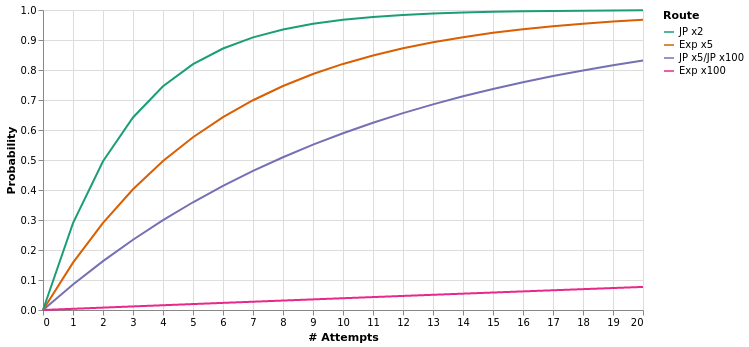

In [126]:
VegaLite({
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
  "width": 600,
  "height": 300,
  "padding": 5,
  "data": {
    "values": data
  },
  "mark": "line",
  "encoding": {
    "x": {"field": "# Attempts", "type": "quantitative"},
    "y": {"field": "Probability", "type": "quantitative"},
    "color": {"field": 'Route', "sort": reversed(routes), "scale": {"scheme": "dark2"}},
  }
})

----

Below is stuff that I need to reintegrate in the text

In [3]:
p_one = sum(probabilities.values())

In [4]:
print('{:.2f}%'.format(p_one*100))

8.20%


Now, the probability `p` below is the probability of a desired event on a Bewildering Grace x4 attempt (that is, 4 rolls)

In [5]:
p = 1 - (1 - p_one)**4

In [6]:
print('{:.2f}%'.format(p*100))

28.98%


We can see that 20 attempts are virtually guaranteed to yield a success, so we will use 20 as a bound.

In [8]:
print('{:.2f}%'.format(attempt(20)*100))

99.89%


Let us now do the same, but excluse JPx2, as this is a slower route